In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implement and Visualize Activation Functions

**i. Implementation of Activation Functions:**

In [41]:
# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid (Binary)
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid (Bipolar)
def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)


**ii. Visualization of Activation Functions:**

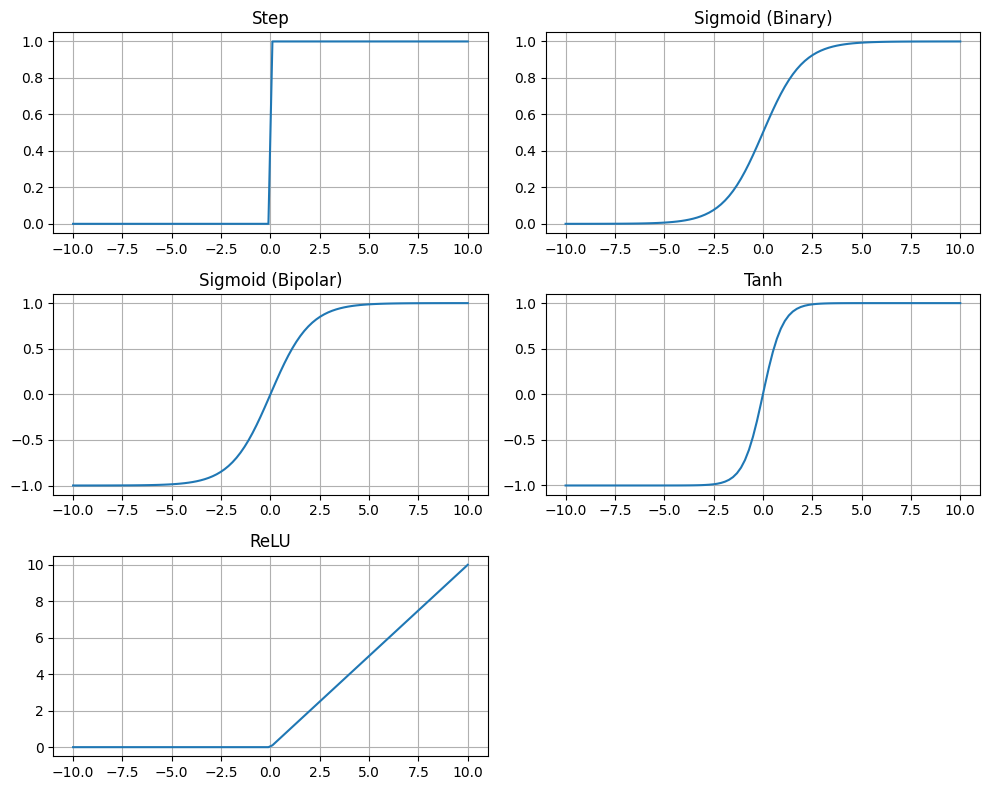

In [42]:
# Visualization
x = np.linspace(-10, 10, 100)

functions = [step_function, sigmoid_binary, sigmoid_bipolar, tanh_function, relu_function]
titles = ['Step', 'Sigmoid (Binary)', 'Sigmoid (Bipolar)', 'Tanh', 'ReLU']

plt.figure(figsize=(10, 8))

for i, func in enumerate(functions):
    plt.subplot(3, 2, i + 1)
    plt.plot(x, func(x))
    plt.title(titles[i])
    plt.grid(True)

plt.tight_layout()
plt.show()

# Interpretation of Activation Function Visualization:

1. Step Function:
  - Output is either 0 or 1, acting like a binary threshold.
  - Useful for simple binary classification problems.

2. Sigmoid (Binary):
  - Outputs values between 0 and 1.
  - Smooth, S-shaped curve, allowing for gradual transitions.
  - Commonly used in logistic regression and binary classification tasks.

3. Sigmoid (Bipolar):
  - Outputs values between -1 and 1.
  - Similar to the binary sigmoid but centered around 0.
  - Useful in scenarios where both positive and negative outputs are required.

4. Tanh Function:
  - Outputs values between -1 and 1.
  - Similar to the sigmoid (bipolar) but has a steeper gradient.
  - Often preferred over the sigmoid in hidden layers of neural networks.

5. ReLU Function:
  - Outputs 0 for negative input and the input itself for positive input.
  - Linear for positive values, providing a non-linearity.
  - Widely used in deep learning models due to its computational efficiency and ability to avoid vanishing gradients.

# 2. Implement a Simple Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

**i. Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).**

In [47]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Activation functions to test
activation_functions = ['logistic', 'tanh', 'relu']

# Store accuracy for each activation function
accuracies = []

**ii. Train the network on a binary classification task (e.g., XOR problem) using a small dataset.**

Activation: logistic, Accuracy: 0.5
Activation: tanh, Accuracy: 1.0
Activation: relu, Accuracy: 0.5


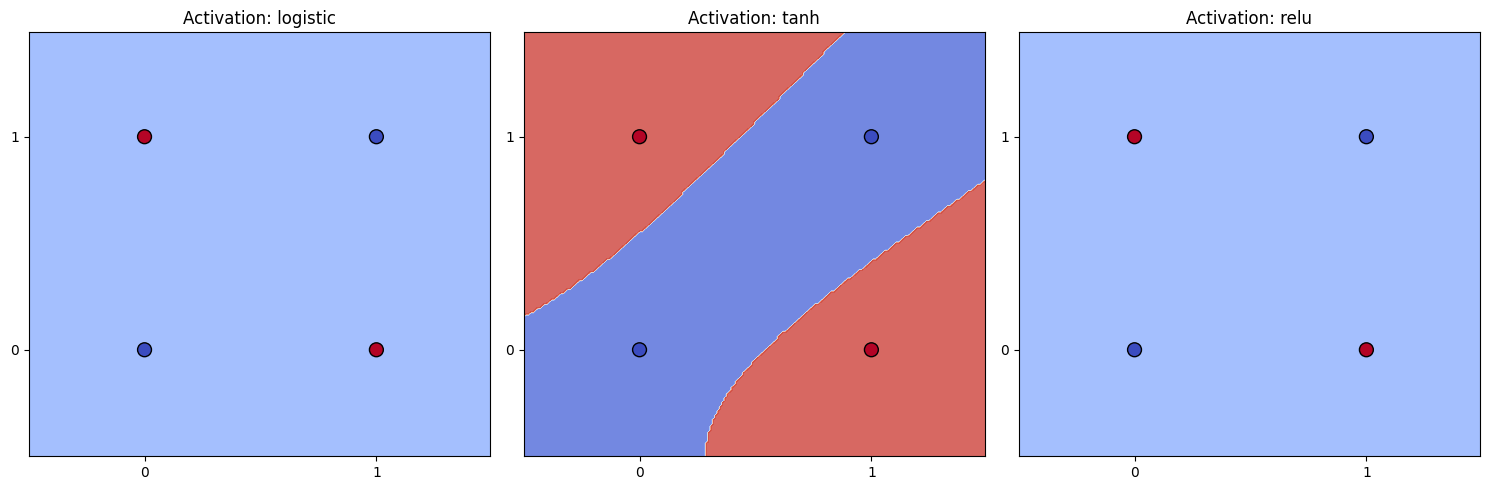

In [48]:
# Train and test a neural network for each activation function
for act in activation_functions:
    # Create the model with 1 hidden layer and 4 neurons
    model = MLPClassifier(hidden_layer_sizes=(4,), activation=act, max_iter=3000, learning_rate_init=0.001, random_state=42)

    # Train the model
    model.fit(X, y)

    # Predict on the XOR data
    predictions = model.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, predictions)
    accuracies.append((act, accuracy))
    print(f"Activation: {act}, Accuracy: {accuracy}")

# Visualize decision boundaries for each activation function
def plot_decision_boundaries(model, X, y, ax, title):
    xx, yy = np.meshgrid(np.arange(-0.5, 1.5, 0.01), np.arange(-0.5, 1.5, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, act in enumerate(activation_functions):
    model = MLPClassifier(hidden_layer_sizes=(4,), activation=act, max_iter=3000, random_state=42)
    model.fit(X, y)
    plot_decision_boundaries(model, X, y, axes[idx], f'Activation: {act}')

plt.tight_layout()
plt.show()


1. **Logistic Activation Function:**
- Accuracy is 0.5.
- This means the perceptron is classifying half of the XOR cases correctly, suggesting it struggles with non-linearly separable data like XOR.


2. **Tanh Activation Function:**
- Accuracy is 1.0.
- Tanh performs well here, likely due to its ability to output both negative and positive values, allowing better decision boundaries for the XOR problem.

3. **ReLU Activation Function:**
- Accuracy is 0.5.
- Like logistic, ReLU struggles with XOR as it's not designed to handle non-linearly separable problems well without deeper layers.

**iii. Compare the performance of the neural network with different activation
functions.**

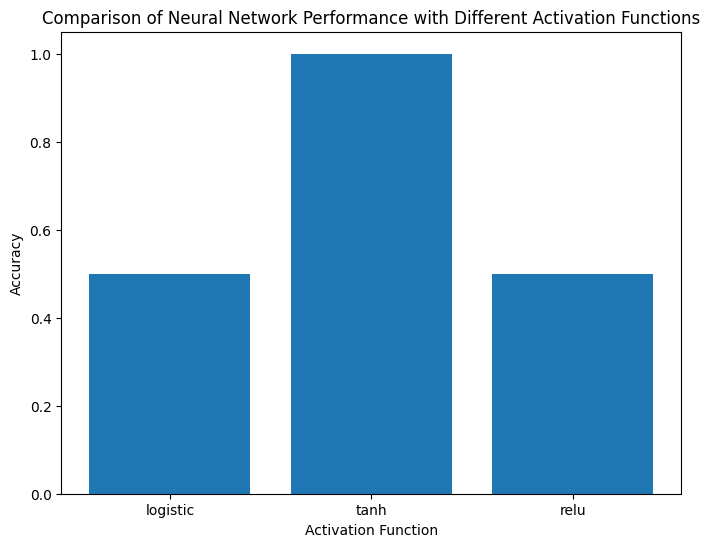

In [46]:
# Create a bar chart to compare the performance of different activation functions
activation_functions_labels = [act for act, _ in accuracies]
accuracies_values = [accuracy for _, accuracy in accuracies]

plt.figure(figsize=(8, 6))
plt.bar(activation_functions_labels, accuracies_values)
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.title("Comparison of Neural Network Performance with Different Activation Functions")
plt.show()


# Interpretation:
- The bar chart visually shows the accuracy achieved by each activation
function.
- The activation function with the highest accuracy on the XOR problem
generally indicates the best performance.
-  "tanh" is likely to perform better than "logistic" and "relu" on
XOR tasks, as they can model more complex decision boundaries.